## Fraud Detection Modeling

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import sys
import joblib

# Data preparation

In [3]:
# Load datasets
fraud_data = pd.read_csv('../data/fraud_data_processed.csv')
creditcard_data = pd.read_csv('../data/credit_data_processed.csv')

# Data Preparation
# Drop the 'device_id' and 'ip_address' columns as they contain string values
fraud_data = fraud_data.drop(columns=['device_id', 'ip_address'])

# Convert datetime columns to numerical features
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time']).astype(int) / 10**9
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time']).astype(int) / 10**9

# Feature and Target Separation
X_fraud = fraud_data.drop('class', axis=1)
y_fraud = fraud_data['class']

X_credit = creditcard_data.drop('Class', axis=1)
y_credit = creditcard_data['Class']

# Train-Test Split
X_fraud_train, X_fraud_test, y_fraud_train, y_fraud_test = train_test_split(X_fraud, y_fraud, test_size=0.2, random_state=42)
X_credit_train, X_credit_test, y_credit_train, y_credit_test = train_test_split(X_credit, y_credit, test_size=0.2, random_state=42)

# Model Selection
models = {
  'Logistic Regression': LogisticRegression(max_iter=1000),
  'Decision Tree': DecisionTreeClassifier(),
  'Random Forest': RandomForestClassifier(),
  'Gradient Boosting': GradientBoostingClassifier(),
  'Multi-Layer Perceptron': MLPClassifier(max_iter=500)
}

# Model Training and Evaluation

In [4]:
# Training and Evaluating Models

# import a function that performs training and evaluating from scripts folder
sys.path.append("../scripts")
from model_train_evaluate import train_and_evaluate

print("--- Fraud Data ---")
best_fraud_model = train_and_evaluate(models, X_fraud_train, X_fraud_test, y_fraud_train, y_fraud_test, "Fraud_Data")

--- Fraud Data ---
Logistic Regression on Fraud_Data: Accuracy=0.9057, Precision=1.0000, Recall=0.0000, F1=0.0000, ROC-AUC=0.5000
Decision Tree on Fraud_Data: Accuracy=0.9032, Precision=0.4885, Recall=0.5674, F1=0.5250, ROC-AUC=0.7528
Random Forest on Fraud_Data: Accuracy=0.9559, Precision=0.9871, Recall=0.5389, F1=0.6972, ROC-AUC=0.7691
Gradient Boosting on Fraud_Data: Accuracy=0.9557, Precision=0.9834, Recall=0.5393, F1=0.6966, ROC-AUC=0.7692
Multi-Layer Perceptron on Fraud_Data: Accuracy=0.9057, Precision=1.0000, Recall=0.0000, F1=0.0000, ROC-AUC=0.5000


In [11]:
print("--- Credit Card Data ---")
train_and_evaluate(models, X_credit_train, X_credit_test, y_credit_train, y_credit_test, "CreditCard_Data")

--- Credit Card Data ---
Logistic Regression on CreditCard_Data: Accuracy=0.9992, Precision=0.8889, Recall=0.5333, F1=0.6667, ROC-AUC=0.7666
Decision Tree on CreditCard_Data: Accuracy=0.9990, Precision=0.6915, Recall=0.7222, F1=0.7065, ROC-AUC=0.8609
Random Forest on CreditCard_Data: Accuracy=0.9995, Precision=0.9559, Recall=0.7222, F1=0.8228, ROC-AUC=0.8611
Gradient Boosting on CreditCard_Data: Accuracy=0.9993, Precision=0.8906, Recall=0.6333, F1=0.7403, ROC-AUC=0.8166
Multi-Layer Perceptron on CreditCard_Data: Accuracy=0.9995, Precision=0.9565, Recall=0.7333, F1=0.8302, ROC-AUC=0.8666


MLPClassifier(max_iter=500)

In [6]:
# Save the best performing model for Fraud Data
joblib.dump(best_fraud_model, '../models/fraud_detection_model.pkl')

['../models/fraud_detection_model.pkl']

# Model Explainability

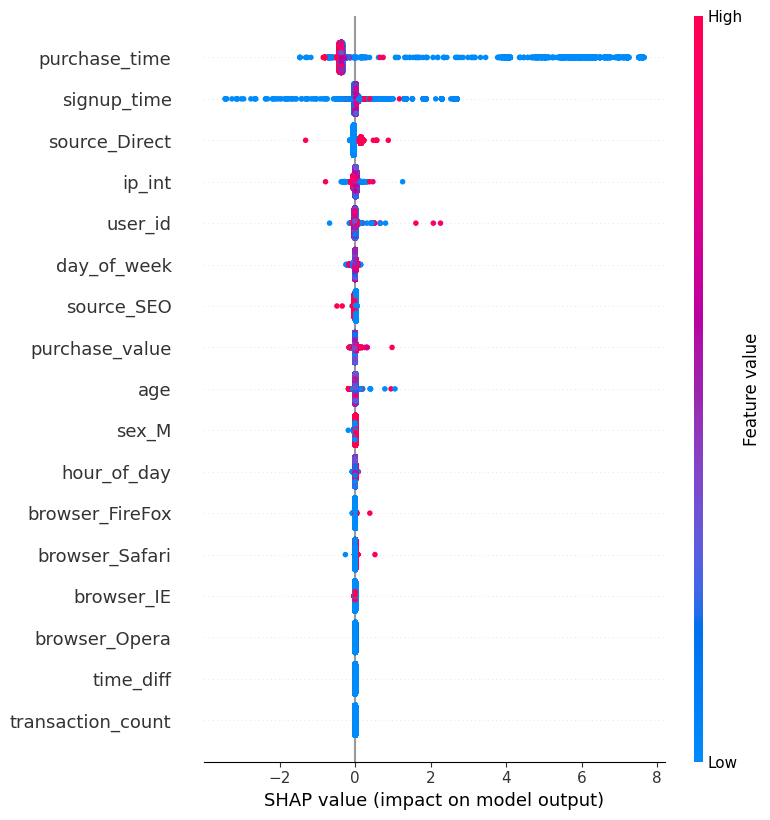

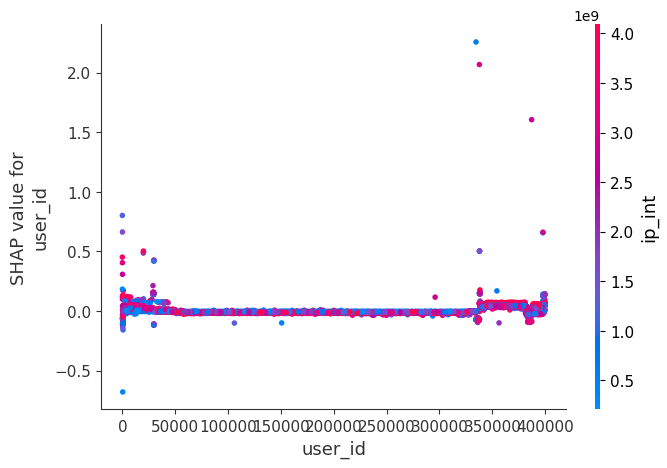

In [ ]:
import shap
import lime
import lime.lime_tabular

# SHAP Explainability Example (Using the best model on Fraud Data)
explainer_shap = shap.TreeExplainer(best_fraud_model)
shap_values = explainer_shap.shap_values(X_fraud_test)

# SHAP Plots
shap.summary_plot(shap_values, X_fraud_test)  # Summary Plot
shap.force_plot(explainer_shap.expected_value, shap_values[0], X_fraud_test.iloc[0])  # Force Plot
shap.dependence_plot(0, shap_values, X_fraud_test)  # Dependence Plot

In [ ]:
# LIME Explainability Example (Using the best model on Fraud Data)
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
  training_data=X_fraud_train.values,
  feature_names=X_fraud_train.columns,
  class_names=['Non-Fraud', 'Fraud'],
  mode='classification'
)

lime_exp = explainer_lime.explain_instance(
  data_row=X_fraud_test.iloc[0].values,
  predict_fn=best_fraud_model.predict_proba
)

# LIME Plot
lime_exp.show_in_notebook(show_table=True, show_all=False)

c:\Users\user\Documents\Python\week-08-09\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
